# SMS SPAM PREDICTION

---



## Process we have to apply for find sms will spam or ham : : :

   * Import libraries
   * Import Dataset
   * Data Cleaning
   * EDA
   * Text Preprocessing
   * Model Building
   * Evaluation
   * Final Model
   * Conclusion

### Import libraries

In [1]:
# data manipulating libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data preprocessing libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# spliting train and test data
from sklearn.model_selection import train_test_split as tts


# classification model performing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

# elaluation matrics
from sklearn.metrics import accuracy_score, confusion_matrix , precision_score, recall_score, f1_score




### import dataset

In [2]:
df = pd.read_csv("/content/sms_spam.csv",encoding = 'latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Data Cleaning

In [3]:
# rename the column
df.rename(columns={'v1':'result' , 'v2':'sms'}, inplace = True)
df.head()

,result,sms,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# drop unnecessary columns
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace= True)
df.head()

,result,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.shape

(5572, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   result  5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df['result'].value_counts()

result
ham     4825
spam     747
Name: count, dtype: int64

In [8]:
df.isnull().sum()

result    0
sms       0
dtype: int64

In [9]:
df.duplicated().sum()

403

In [10]:
df.drop_duplicates(keep='first', inplace = True)
df.head(5)

,result,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(5169, 2)

In [13]:
# Use label encoder for result colunm
le = LabelEncoder()
df['result'] = le.fit_transform(df['result'])
df.head()

,result,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# check which data is ham and spam

# ham = 0
# spam= 0


df['result'].value_counts()

result
0    4516
1     653
Name: count, dtype: int64

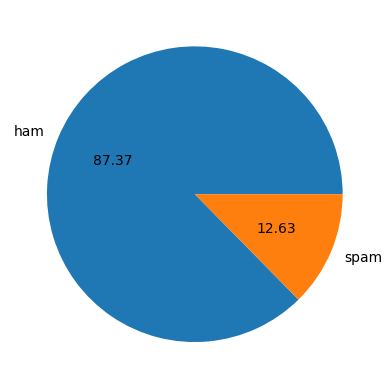

In [15]:
# visualization how much data is ham and spam by pie-chart

plt.pie(df['result'].value_counts(), labels =['ham','spam'] , autopct = '%.2f')
plt.show()

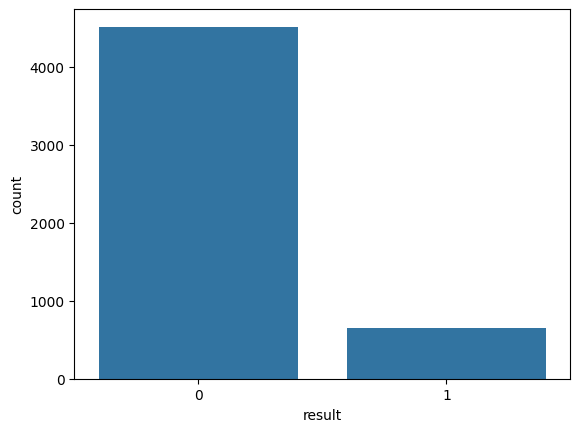

In [16]:
# visulization by bar graph

sns.countplot(x= 'result', data = df)
plt.show()

In [17]:
# now check how much words, characters and sentences use in sms

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
# count no of characters use in sms columns store in new row
df['characters'] = df['sms'].apply(len)
df.head()

,result,sms,characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
# use nltk.punkt for count no of word use in sms set
df['words']= df['sms'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,result,sms,characters,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [20]:
# no of sentences use in sms
df['sente'] = df['sms'].apply(lambda x : len(nltk.sent_tokenize(x)))
df.head()

,result,sms,characters,words,sente
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


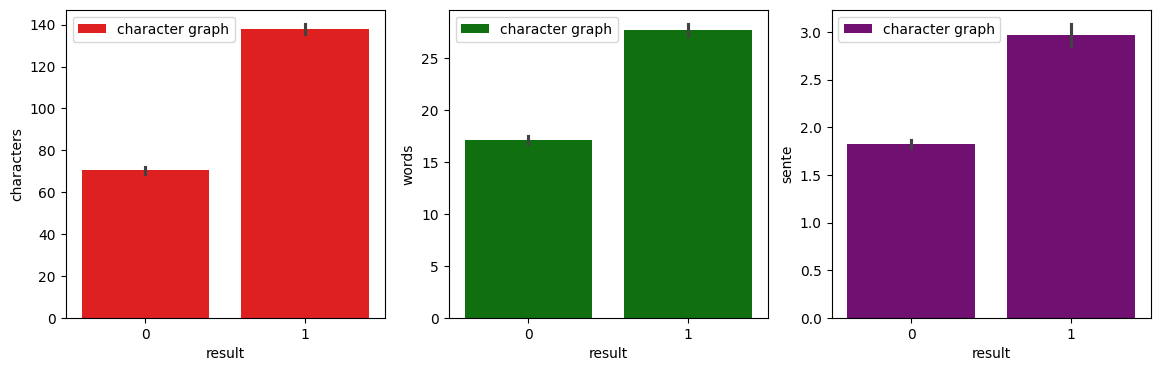

In [21]:
# plot bar graph when result is 0 then characters, words and sente occurance
plt.figure(figsize = (14,4))
plt.subplot(1,3,1)
sns.barplot(x= 'result', y = 'characters', data = df, color= 'red' , label = 'character graph')
plt.subplot (1,3,2)
sns.barplot(x= 'result', y = 'words', data = df, color= 'green' , label = 'character graph')
plt.subplot(1,3,3)
sns.barplot(x= 'result', y = 'sente', data = df, color= 'purple',label = 'character graph')
plt.show()

In [22]:
# spam characters, words , senteces describe

df[df['result']==1][['characters','words','sente']].describe()

,characters,words,sente
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [23]:
# ham characters, words , senteces describe

df[df['result']==0][['characters','words','sente']].describe()

,characters,words,sente
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


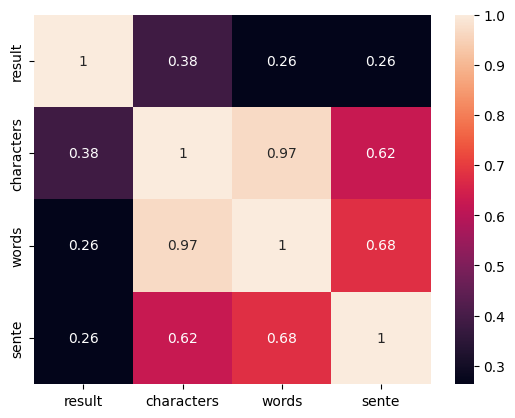

In [24]:
#check correlation by plotting heatmap

sns.heatmap(df[['result','characters','words','sente']].corr(), annot = True)
plt.show()

### Data Preprocessing

  1. Convert sms data in lower case
  2. Tokenize the data
  3. Removing Special Character
  4. Removing Stopwords and punctuation
  5. Stemming

In [25]:
ps = PorterStemmer()

In [26]:
# create a function for do all of these things

def transformed_sms(sms):

  # convert data in lower case
  sms = sms. lower()

  # tokenize the data
  sms = nltk.word_tokenize(sms)

  # remove special character
  y = []
  for i in sms:
    if i.isalnum():
      y.append(i)

  # store y value in sms data
  sms = y[:]
  y.clear()

  # removing stopwords and punctuation
  for i in sms :
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  # store y value in sms data
  sms = y[:]
  y.clear()

  # stemming the data
  for i in sms:
    y.append(ps.stem(i))



  return " ".join(y)


In [27]:
# Example

transformed_sms('Hii how are yoU ?, can you please come with me i just wanna show you something ?')

'hii pleas come wan na show someth'

In [28]:
# apply on our sms column
df['transformed_sms'] = df['sms'].apply(transformed_sms)
df.head()

,result,sms,characters,words,sente,transformed_sms
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [29]:
# word cloud uses for highlight the important words
from wordcloud import WordCloud
wc = WordCloud (width = 400, height=400, min_font_size =10, background_color='white')

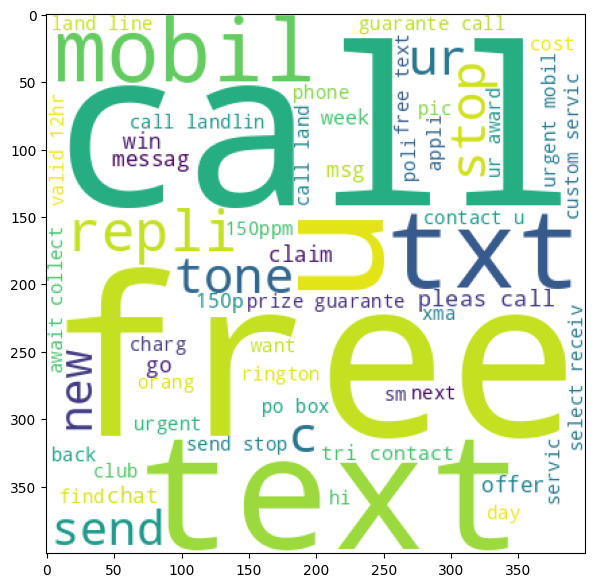

In [30]:
spam_wc = wc.generate(df[df['result']==1] ['transformed_sms'].str.cat(sep=" ") )
plt.figure(figsize=(15,7))
plt.imshow(spam_wc)

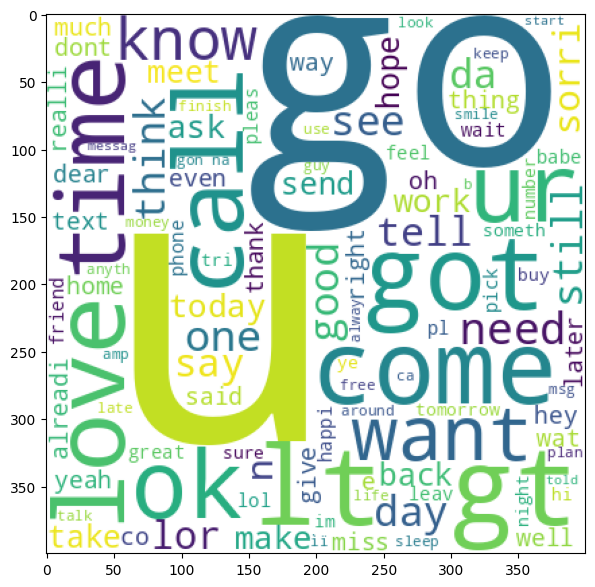

In [31]:
ham_wc = wc.generate(df[df['result'] == 0]['transformed_sms'].str.cat(sep = " "))
plt.figure(figsize=(15,7))
plt.imshow(ham_wc)

In [32]:
#convert this all spam words into a list
spam_words = []
for msg in df[df['result']==1]['transformed_sms'].tolist():
  for word in msg.split():
    spam_words.append(word)

In [33]:
spam_words

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [34]:
len(spam_words)

9939

In [35]:
# find top 50 words which occurence is high
from collections import Counter
counter = Counter(spam_words)
counter.most_common(50)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45),
 ('custom', 42),
 ('messag', 42),
 ('guarante', 42),
 ('per', 41),
 ('chat', 38),
 ('tri', 37),
 ('msg', 35),
 ('draw', 35),
 ('number', 35),
 ('cs', 35),
 ('show', 33),
 ('today', 33),
 ('offer', 33),
 ('line', 33),
 ('go', 32),
 ('receiv', 31),
 ('want', 31),
 ('latest', 30),
 ('rington', 30),
 ('landlin', 30)]

In [36]:
# now we convert this in dataframe
pd.DataFrame(counter.most_common(50))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


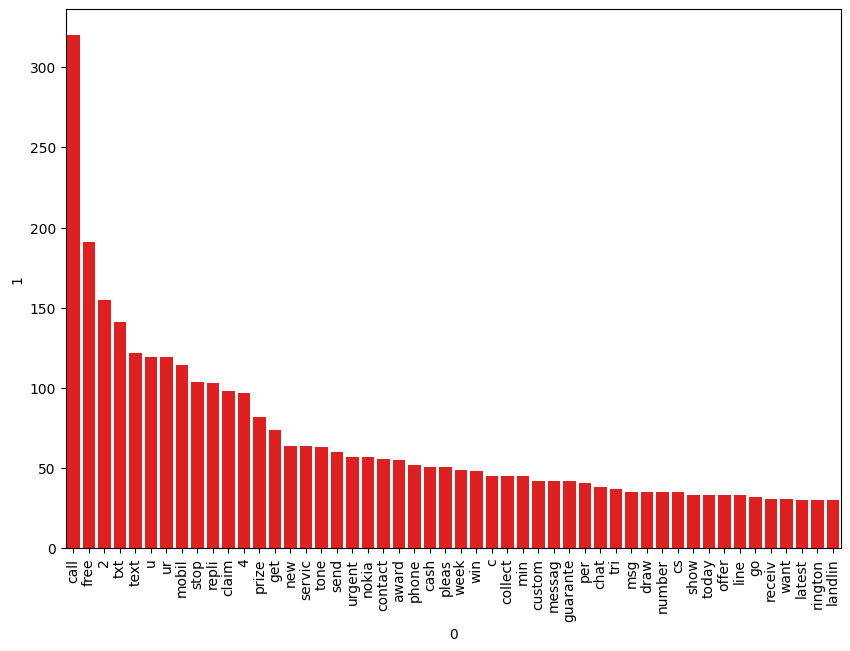

In [37]:
# now we show these words occurence by ploting using bar plot
plt.figure(figsize=(10,7))
sns.barplot(x=pd.DataFrame(counter.most_common(50) )[0] , y=pd.DataFrame(counter.most_common(50)) [1] , data = pd.DataFrame(counter.most_common(50)) , color='red')
plt.xticks(rotation = 'vertical')
plt.show()


In [38]:
# store ham word into a list
ham_words= []
for msg  in df[df['result'] == 0] ['transformed_sms'].tolist():
  for word in msg.split():
    ham_words.append(word)

In [39]:
# ham_words
ham_words

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [40]:
# find top 50 occurence ham words
from collections import Counter
counter = Counter(ham_words)
counter.most_common(50)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129),
 ('say', 127),
 ('back', 127),
 ('today', 123),
 ('hope', 122),
 ('ask', 121),
 ('sorri', 121),
 ('n', 120),
 ('send', 120),
 ('r', 120),
 ('work', 118),
 ('dont', 118),
 ('meet', 112),
 ('hi', 111),
 ('well', 109),
 ('thing', 109),
 ('wat', 108),
 ('k', 107),
 ('much', 107),
 ('night', 107),
 ('oh', 106)]

In [41]:
# convert this into a dataframe
pd.DataFrame(counter.most_common(50))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


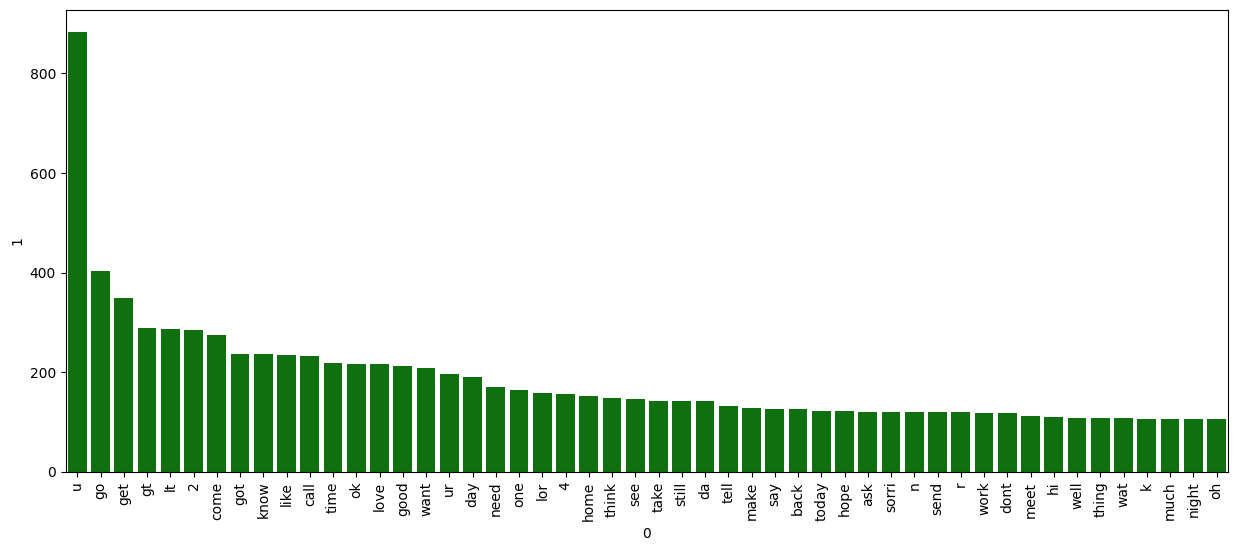

In [42]:
# now we convert this dataframe into plot
plt.figure(figsize =(15,6))
sns.barplot(x= pd.DataFrame(counter.most_common(50))[0], y = pd.DataFrame(counter.most_common(50))[1], data=pd.DataFrame(counter.most_common(50)),color ='green')
plt.xticks(rotation = 'vertical')
plt.show()

# Model Building

In [43]:
# now we have to vectorize our data using CountVecterizer, TfidfVectorizer
cv= CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [44]:
# countvaectorizer train x dataset
cv_x = cv.fit_transform(df['transformed_sms']).toarray()

In [45]:
# tfidf train x dataset
tfidf_x = tfidf.fit_transform(df['transformed_sms']).toarray()

In [46]:
# first split train and test data for countvaectorizer
x1 = cv_x
y1 = df['result']

In [47]:
# first split train and test data for tfidf
x2 = tfidf_x
y2 = df['result']

In [48]:
# use train_test_split for train and test data for counterVectorizer
train_x1, test_x1, train_y1, test_y1 = tts(x1,y1, test_size=0.2 , random_state =2)
train_x1.shape, test_x1.shape, train_y1.shape, test_y1.shape

((4135, 6708), (1034, 6708), (4135,), (1034,))

In [49]:
# use train_test_split for train and test data for tfidfVectorizer
train_x2, test_x2, train_y2, test_y2 = tts(x2,y2, test_size=0.2 , random_state =2)
train_x2.shape, test_x2.shape, train_y2.shape, test_y2.shape

((4135, 3000), (1034, 3000), (4135,), (1034,))

In [50]:
# Create a list of all models
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), BernoulliNB(), MultinomialNB(), GaussianNB()]

## Evaluations model

In [51]:
# apply this list into the fuction which give accuracy and precision dependent on list models name
def perform_new_model(models, train_x1, train_y1, test_x1, test_y1):
  results = []
  for model in models:
    model.fit(train_x1, train_y1)
    pred_y1 = model.predict(test_x1)
    accuracy = accuracy_score(test_y1, pred_y1)
    precision = precision_score(test_y1, pred_y1)
    results.append({'Model': type(model).__name__, 'Accuracy': accuracy, 'Precision': precision})

  return  pd.DataFrame(results)


In [54]:
# create a fuction that performs classification model on the train and test set data and give output of precision and accuracy1 of the model and store in an dataframe
def perform_model(model, train_x1, train_y1, test_x1, test_y1):
  model.fit(train_x1, train_y1)
  pred_y1 = model.predict(test_x1)
  accuracy = accuracy_score(test_y1, pred_y1)
  precision = precision_score(test_y1,pred_y1)
  return (accuracy, precision)

# CountVectorizer DataFrame

In [55]:
cv_dataframe =perform_new_model(models, train_x1, train_y1, test_x1, test_y1)

In [56]:
cv_dataframe

,Model,Accuracy,Precision
0,LogisticRegression,0.978723,0.991525
1,DecisionTreeClassifier,0.954545,0.895652
2,RandomForestClassifier,0.970986,1.000000
3,BernoulliNB,0.970019,0.973451
4,MultinomialNB,0.964217,0.834437
5,GaussianNB,0.880077,0.531532


# TfidfVectorizer Dataframe

In [57]:
tfidf_dataframe = perform_new_model(models, train_x2, train_y2, test_x2, test_y2)

In [58]:
tfidf_dataframe

,Model,Accuracy,Precision
0,LogisticRegression,0.956480,0.979381
1,DecisionTreeClassifier,0.954545,0.827338
2,RandomForestClassifier,0.975822,0.982906
3,BernoulliNB,0.983559,0.991870
4,MultinomialNB,0.970986,1.000000
5,GaussianNB,0.869439,0.506849


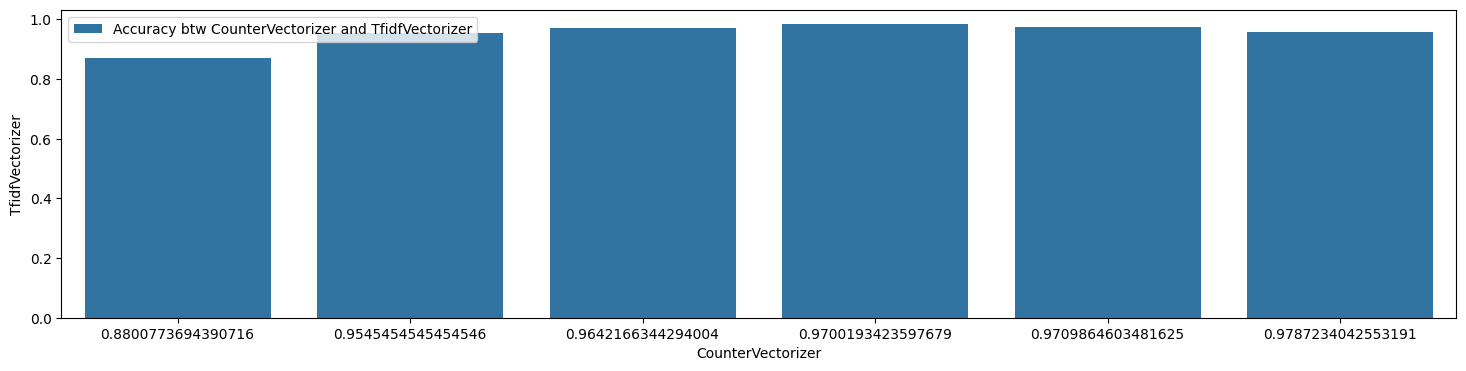

In [59]:
# accuracy btw them dataframe
plt.figure(figsize=(18,4))
sns.barplot(x= cv_dataframe['Accuracy'], y= tfidf_dataframe['Accuracy'], label = 'Accuracy btw CounterVectorizer and TfidfVectorizer')
plt.xlabel('CounterVectorizer')
plt.ylabel('TfidfVectorizer')
plt.show()

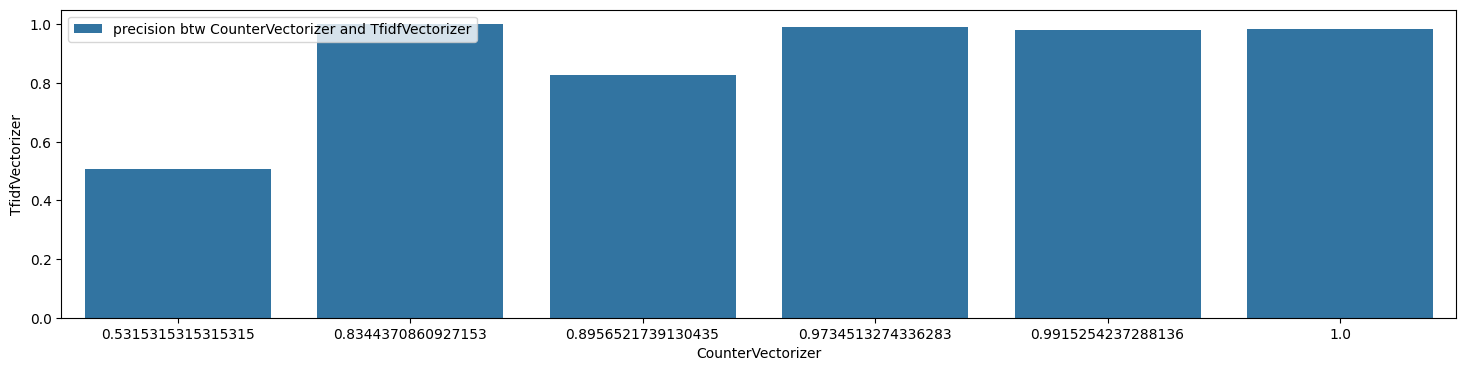

In [60]:
# precision btw them dataframe
plt.figure(figsize=(18,4))
sns.barplot(x= cv_dataframe['Precision'], y= tfidf_dataframe['Precision'], label = 'precision btw CounterVectorizer and TfidfVectorizer')
plt.xlabel('CounterVectorizer')
plt.ylabel('TfidfVectorizer')
plt.show()

# Final Model Selected :

In [63]:
model = MultinomialNB()
model.fit(train_x2, train_y2)
pred = model.predict(test_x2)
accuracy = accuracy_score(test_y2, pred)
precision = precision_score(test_y2, pred)
print("accuracy of the model : " + str(accuracy))
print("precision of the model : " + str(precision))

accuracy of the model : 0.9709864603481625
precision of the model : 1.0


# Conclusion :

  * Dependend on this visualization and models classification evaluations for precision is a highest factor for classification for this dataset and for this text dataset we use different types of classification model but "Naive Bayes.MultiNomialNB()" Classification model shows clear-cut result for this classification dataset.

  * For vectorization of data we found for this dataset "TfidfVectorizer" is working very fast and give best result. So I preffer for this dataset "TfidfVectorizer".

  * So we preffer for this dataset we finally use "multinomialNB()" model for best prediction.
